## EAS 503 Homework 1 Submission
Name - Boobalaganesh Ezhilan

**Make sure that you rename the notebook file to *replacewithubitname*_eas503_hw1.ipynb**


### Submission Details
* **Due Date** - September 25, 2018 by 11:59 PM EST. All assignments have to be submitted using UBLearns.
* **Number of Problems** - 4
* **Maximum points** - 50
* **Collaboration policy**
 - Every student has to submit individual homeworks
 - Any collaboration, in the form of discussion, with other members of the class is permitted, as long as the names of the collaborating members are explicitly stated on top of the submitted homework.
 - Any overlap with another submission or material from Internet will be awarded an F.
* **Late submission policy** - _No late submissions allowed_
* **Submission Format** - Enter code for each problem in the appropriate cell below. You may use multiple cells for a single problem to improve readability.
* **Testing Protocol** - To grade, we will simply execute your notebook from command line using the following command:
```shell
jupyter nbconvert --execute <notebook>
```
Please make sure that your notebook produces the desired output with the above command, before submitting.

### Problem 1 - Testing for  Fibonacci Number (10 Points)
Develop functions to handle [Fibonacci numbers](http://mathworld.wolfram.com/FibonacciNumber.html). Try to design the quickest possible algorithm and record the time taken for the code to run.

Test if a number belongs to the Fibonacci series, using `if-else` conditions. The logic of testing if a number, $n$, belongs to the Fibonacci series is: if one or both of $(5*n^2 + 4)$ or $(5*n^2 – 4)$ is a perfect square.

Here is what you need to do:
1. You will need to implement the function `fibonacciGenerator`, which takes no inputs. The function should return a Python `list` of length 25, with first 25 Fibonacci numbers.
2. You will need to define a function `fibonacciTester`, which takes a single number as input, and returns `true` if the number belongs to the Fibonacci series, and `false` otherwise. 

In [3]:
def fibonacciGenerator():
    #importing the package required for taking Square root
    from math import sqrt
    
    #Initializing list
    fibNumList = []
    
    regFibList=0
    # using while loop for iteration.
    while(regFibList<25):
        
        #fibinacci sequence can be expressed in Formula
        # F(n) = ((1+√5)/2 - (1-√5)/2)/√5
        A = (1+sqrt(5))/2
        B = (1-sqrt(5))/2
        
        #substituting the Values of A and B in the formula
        genFibNumber = ((A**regFibList)-(B**regFibList))/sqrt(5)
        
        # Generated fibonacci number rounded to nearest integer
        fibNumList.append(round(genFibNumber))
        
        #List is incremented
        regFibList=regFibList+1
        
    #returning the generated fibonacci List    
    return [fibNumList];

import time
st = time.time()
l = fibonacciGenerator()
en = time.time()
print("The fibonacci Number for first 25 numbers is")
print(l)
print("The code took %d seconds."%(en - st))

The fibonacci Number for first 25 numbers is
[[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368]]
The code took 0 seconds.


In [4]:
def fibonacciTester(n):
    #importing math package for finding square root                
    from math import sqrt
    
    #storing formula into the variable
    firstSqr = ((5*n**2)+4)
    
    #storing formula into the variable
    secSqr = ((5*n**2)-4)
                    
    #checking perfect square condition
    if(sqrt(firstSqr)-int(sqrt(firstSqr)) and (sqrt(secSqr) - int(sqrt(secSqr)))):
        return False
    else:
        return True
    
    
# Function Calling 
import time
st = time.time()
for i in range(1,21):
    v = fibonacciTester(i)
    print(i,v)
en = time.time()
print("The code took %d seconds."%(en - st))

1 True
2 True
3 True
4 False
5 True
6 False
7 False
8 True
9 False
10 False
11 False
12 False
13 True
14 False
15 False
16 False
17 False
18 False
19 False
20 False
The code took 0 seconds.


### Problem 2 - Handling Exceptions (10 Points)
In this problem you will read from a text file (**data_p2.txt**) included in the assignment. Please download it and store it in the same directory as this notebook. The code for reading data from the file is given below. You need to store the data and perform a simple mathematical operation on each data point. Each line is _supposed_ to contain a floating point number. But what you will observe is that some lines might have erroneous entries. You need to ignore those lines (Hint: Use `Exception` handling). 

The idea is to implement a function, `computeMedian()`, which reads in a file and computes the median of the numbers and returns the output. You may use the inbuilt function `sort` when computing the median.

_DO NOT USE ANY INBUILT OR OTHER FUNCTION TO DIRECTLY COMPUTE MEDIAN_

In [ ]:
# Reading from a file. The following code just reads in every line in a text file without doing anything with it.
# You can use the code in your solution. Do not call this function in your implementation.
def dummyFileReader():
    with open('data_p2.txt','r') as f: #we open the file in 'read' mode. The 'with' clause is similar to 'finally' clause
        for line in f: #iterate over the file line by line
            s = line.strip() #strip() removes the endline character at the end of the line. Line is of type 'str'

In [1]:
def computeMedian():
    # Created the List to append the float numbers
    floatNumberList = [];
    with open('data_p2.txt','r') as f: #we open the file in 'read' mode. The 'with' clause is similar to 'finally' clause
        for line in f: #iterate over the file line by line
            s = line.strip() 
            #Using try exception block to ignore the rows which are other than Float Numbers
            try:
                floatNumberList.append(float(s));
            except:
                pass
    # Performing Sorting in the List
    floatNumberList.sort()
    
    #Checking the length of the list if it is even then I will return the middle number otherwise average of middle two elements
    if ((len(floatNumberList))%2) != 0:
        return floatNumberList[int(len(floatNumberList)/2)] 
    else:
        return ((floatNumberList[int((len(floatNumberList)-1)/2)])+(floatNumberList[int((len(floatNumberList))/2)]))/2

print("The Median Value for data_p2 .txt file is :" ,computeMedian())

The Median Value for data_p2 .txt file is : 0.499675


### Problem 3 - Benchmarking Dictionary Performance (10 Points)
We want to check the peformance of the Python inbuilt `del` routine for dropping elements from a dictionary. The question that we want answer for is: 
_Does the time required to delete an element from a Python dictionary depend on the size of the dictionary and on the location of the target element?_

In each step of the experiment do the following: 
- Create a dictionary of integers from 1 to N, with your own desired keys. 
- Within a loop, delete the $i^{th}$ element. Measure the time taken to delete the element (Hint: use the `time` package in Python).

Conduct the above experiment for $N = 1,000,000$ and $i$ ranging from $1$ to $1,000,000$ in steps of $10,000$. Make sure that you are recreating the Python dictionary every time. Save the times in a list (let us name it `timeMillion`).

Repeat the above experiment, but set $N = 10,000,000$. This time, vary $i$ from $1$ to $10,000,000$ in steps of $100,000$. Save the times for this experiment in another list, say, `time10Million`.

Plot the two lists using the `matplotlib.pyplot` package. See below for a sample code. You can plot both lists in the same chart to compare.

Using the plots, answer the following (create a markup cell after your code cell(s) and enter your responses):
1. Does the cost of deleting an element depend on the dictionary size?
2. Does the cost of deleting an element depend on the location of the deleted element?



In [ ]:
# This cell is only for demonstration purposes, you can reuse parts of this code to create your own plots
# Using matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline 
# above line is needed to make sure that the plots are displayed in the notebook.

#generate some dummy data
x = list(range(0, 20)) # generate a list
y = [x1**2+2*x1 for x1 in x] # create a new list using the original list. Note the Pythonic inline creation of lists.
y1 = [x1**2.3 for x1 in x]
plt.plot(x,y)
plt.plot(x,y1)

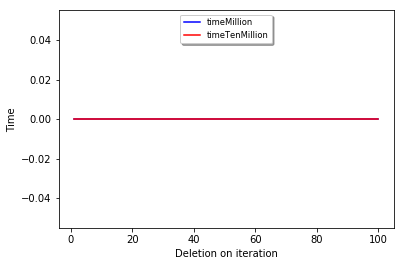

In [7]:
# Enter your solution hereimport timeit
#Creating the dictionary for N = 1,000,000
millionDict=dict();
def millionDictionary():
    for dictMillion in range(1,1000001):
        millionDict[dictMillion]=dictMillion;
        
#Creating the dictionary for N = 10,000,000        
tenmillionDict = dict();
def tenMillionDictionary():
    for dictTenMillion in range(1,10000001):
        tenmillionDict[dictTenMillion]=dictTenMillion; 

#Deleting the every 10000th Element in the dictionary      
import time;
millionDictionary();
timeMillionList = [];
for i in range(1,1000001,10001):
    startTime = time.time();
    del millionDict[i];
    endTime = time.time();
    millionDictionary();
    timeMillionList.append(endTime-startTime)

#Deleting the every 100000th Element in the dictionary
tenMillionDictionary();
tenTimeMillionList = [];
for j in range(1,10000001,100001):
    startTime = time.time(); 
    del tenmillionDict[j];
    endTime = time.time();
    tenMillionDictionary();
    tenTimeMillionList.append(endTime-startTime)

import matplotlib.pyplot as plt
%matplotlib inline 
# above line is needed to make sure that the plots are displayed in the notebook.

#generate some dummy data
x = list(range(1,101)) # generate a list
plt.plot(x,timeMillionList,'b',label = 'timeMillion')
plt.plot(x,tenTimeMillionList,'r',label = 'timeTenMillion')
plt.ylabel("Time")
plt.xlabel("Deletion on iteration")
plt.legend(loc='upper center',shadow = True,fontsize = 'small' )

## 1.Does the cost of deleting an element depend on the dictionary size?
## 2.Does the cost of deleting an element depend on the location of the deleted element?

The Dictionaries in python are implemented as the hash tables.For such hash table average time complexity is **O(1)**.
unlike list where the time complexity of deletion depends location of the element for example, if we need to delete the **100th** element in the list of **1000** elements.Initially it will delete the element in the corresponding index and later it will append the remaining list in the place of the deleted one. So the time complexity of the list is **O(n)**,In Dictionaries does not have any order of storing key-value pair so deleting an element on a particular location does not have any effect like even if delete a particular key-value pair it won't be  appending the remaining in place of deleted one since the dictionaries are unordered Data structure so the time Complexity is O(1) for the **del** operator .

Based upon the graph the red line for Million dictionary and blue line for TenMillion dictionary more or less align with each other ,so the time complexity for the deletion is independent of the Size and location of the elements.The some spikes in the graphs can be due to round off error in the intercept or may be due to noises









## Problem 4 - The Two Envelopes Problem (20 Points)
The Two Envelopes problem is an interesting decision theory problem.

> Consider that you are given two indistinguishable envelopes, each containing money, one contains twice as much as the other. You may pick one envelope and keep the money it contains. Having chosen an envelope at will, but before inspecting it, you are given the chance to switch envelopes. Should you switch?

> The game is this: _stick_ or _switch_; It seems obvious that there is no point in switching envelopes as the situation is symmetric. However, because you stand to gain twice as much money if you switch while risking only a loss of half of what you currently have, it is possible to argue that it is more beneficial to switch.The problem is to show what is wrong with this argument.

**Two Envelopes problem**: Implement a function, called `simulateProblem()`, that does the game simulation for the two envelopes problem. Run the simulation 1000 times to figure out the empirical (observed) probability of gaining more money when switching and gaining more money when sticking to the original choice. Each simulation operates as follows:
1. First, randomly pick an envelopes configuration out of the two possible configurations, $(A,2A)$ or $(2A,A)$. In the first configuration, the second envelope has twice the money and in the second configuration, the first envelope has twice the money.
2. Next, randomly pick one of the two envelopes. 
3. Finally, randomly choose to either stick or switch. The program checks if you won (the envelope that picked has more money) or not (the envelope that picked has less money). In case of winning, record if the winning was because of _sticking_ or _switching_.

You can perform the _random_ choice as follows, using the `np.random.randint()` method.
```python
import numpy as np
print(np.random.randint(2))
```
The `simulateProblem()` function takes no arguments and returns two values, first is a boolean output which is `True` if you win and `False` if you lose. In case of a win, the second output is `True` if the win was due to _sticking_ and `False` if the win was due to _switching_.

Once the method `simulateProblem()` that does the above steps and returns _sticking_,or _switching_, depending on the win/loss scenario, run the method 1000 times and count the number of times the win was due to _sticking_ to the pick in Step 2, and number of times the win was due to _switching_ the envelope.

In [ ]:
def simulateProblem():
    import numpy as np
    firstRandom = np.random.randint(2);
    tupple1 = (0,1)
    tupple2 = (1,0)
    if(firstRandom):
        secondRandom = tupple1[np.random.randint(2)];
        thirdRandom = tupple1[np.random.randint(2)];
        if(secondRandom == 0 and thirdRandom == 0):
            return False,False
        if(secondRandom == 0 and thirdRandom == 1):
            return True,True
        if(secondRandom == 1 and thirdRandom == 0):
            return True,False
        if(secondRandom == 1 and thirdRandom == 1):
            return False,True
    else:
        fourthRandom = tupple2[np.random.randint(2)];
        fifthRandom = tupple2[np.random.randint(2)];
        if(fourthRandom == 0 and fifthRandom == 0):
            return False,False
        if(fourthRandom == 0 and fifthRandom == 1):
            return True,True
        if(fourthRandom == 1 and fifthRandom == 0):
            return True,False
        if(fourthRandom == 1 and fifthRandom == 1):
            return False,True   
        
        
switchcounter = 0
stickcounter = 0
winSwitch = 0
winStick = 0
successlist = switchlist = []
for i in range(1000):
    wl,ss = simulateProblem()
    if(ss):
        if(wl):
            winSwitch = winSwitch + 1
            switchcounter = switchcounter + 1    
    else:
        if(wl): winStick = winStick + 1
        stickcounter = stickcounter + 1 
        
print("Number of wins due to Switching :" , winSwitch) 
print("Number of wins due to Sticking :",winStick)
print("Probability of winning due to Switching :" , (winSwitch) / 1000)
print("Probability of winning due to Switching :" ,(winStick) / 1000)

### Which is better - sticking or switching?
The probability of winning(**P**) and losing(**1-p**) is given by **1/2** and **1/2**.Now the sample space will become ** 1/2**. Then the
winning due to sticking and switching will be around **1/4** and **1/4**.
Based upon the simulation I got, The number of win due to sticking and switching are approximately same.In this case of only two envelopes sticking and switching does have any effect of probability of winning.If Incase of three envelope switching will have an edge over the sticking since the probability will become 1/3 So I would always go for the switching whatever the envelope I choose where my probability of winning we be incresing.So we can say in this case of two envelope there is the **50:50** chance of getting **2A** and **A**.So it doesn't matter if we switch or Stick to the envelope number of wins would be the same incase of the two results based upon the results we got from the simulation